# Assignment Week 04

In [2]:
#read full dataset
with open("../data/OpenSubtitles/OpenSubtitles_sample.th","r",encoding='utf-8') as f:
    th_lines = f.readlines()
    th_lines = [i[:-1] for i in th_lines]
with open("../data/OpenSubtitles/OpenSubtitles_sample.zh_cn","r",encoding='utf-8') as f:
    zh_lines = f.readlines()
    zh_lines = [i[:-1] for i in zh_lines]

In [3]:
len(th_lines)

100

In [4]:
th_lines[:10]

['คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?',
 'เป็นไปไม่ได้รึไง? แต่มันจริงนะ',
 'คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?',
 'ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา',
 'ฉันยังจำเสียงหัวใจเต้นของพ่อได้',
 'ไม่ใช่ฉันที่จำได้ แต่เป็นความทรงจำของฉันต่างหาก',
 'แต่คุณไม่ใช่ คาธอลิกแล้วนี่?',
 'เขาปล่อยให้คนอื่นผ่านไป',
 'ทำไมอยู่ดีๆถึงพูดเรื่องพิธีล้างบาปขึ้นมาล่ะ?',
 'ฉันนึกถึงมันบ่อยๆ บางทีฉันก็จำได้']

In [5]:
len(zh_lines)

100

In [6]:
zh_lines[:10]

['记得自己的洗礼仪式 这可能吗?',
 '不可能?',
 '可那是事实啊 是听大人们说的吧?',
 '我能感受到透过玻璃的阳光',
 '我还记得爸爸的心跳声呢',
 '真的不是听来的 是记忆里的',
 '你也不是信天主教的吧',
 '改新教也有洗礼这种仪式',
 '为什么忽然提起洗礼仪式?',
 '最近想起来的 偶尔会想起']

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame({'th':th_lines,'zh':zh_lines}) 

In [12]:
df

,th,zh
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢
...,...,...
95,มันมีค่าต่อคุณมากนี่,是你非常爱惜的
96,บางทีคุณก็เจอกันโดยบังเอิญใน ภัตตาคารที่เคยมาด...,偶尔会在恋爱时常常约会的饭店碰面
97,และเจอกันในบาร์ที่เคยไปเมาด้วยกัน ดื่ม,也会在经常光顾的酒吧碰面
98,ดื่ม,干


In [13]:
df.shape

(100, 2)

In [14]:
df.drop_duplicates().shape

(99, 2)

In [11]:
df.th.nunique(),df.zh.nunique()

(99, 99)

In [12]:
#save deduped
df.to_csv('../data/OpenSubtitles/OpenSubtitles_sample_zhth_dedup.txt',header=None, index=None, sep='\n')

In [15]:
from pythainlp import word_tokenize

In [16]:
import jieba

In [17]:
df['th_str'] = df.th.map(lambda x: len(x))

In [18]:
df['zh_str'] = df.zh.map(lambda x: len(x))

In [19]:
df['th_word'] = df.th.map(lambda x: len(word_tokenize(x)))

In [20]:
df['zh_word'] = df.zh.map(lambda x: len(jieba.lcut(x)))
df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\PC-2\AppData\Local\Temp\jieba.cache
Loading model cost 0.541 seconds.
Prefix dict has been built successfully.


,th,zh,th_str,zh_str,th_word,zh_word
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?,44,15,12,10
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?,30,4,9,3
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?,33,16,8,14
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光,43,12,8,7
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢,31,11,9,7
...,...,...,...,...,...,...
95,มันมีค่าต่อคุณมากนี่,是你非常爱惜的,20,7,6,5
96,บางทีคุณก็เจอกันโดยบังเอิญใน ภัตตาคารที่เคยมาด...,偶尔会在恋爱时常常约会的饭店碰面,60,16,15,10
97,และเจอกันในบาร์ที่เคยไปเมาด้วยกัน ดื่ม,也会在经常光顾的酒吧碰面,38,12,11,8
98,ดื่ม,干,4,1,1,1


array([[<AxesSubplot:title={'center':'th_str'}>,
        <AxesSubplot:title={'center':'zh_str'}>],
       [<AxesSubplot:title={'center':'th_word'}>, <AxesSubplot:>]],
      dtype=object)

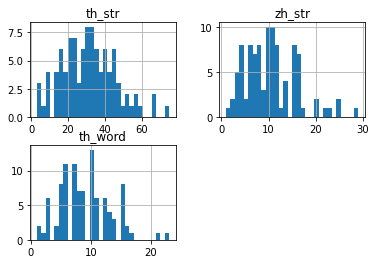

In [99]:
df.hist(bins = 30)

In [108]:
df.th_str.sum()

3106

In [109]:
df.th_str.mean()

31.06

In [102]:
df.zh_str.sum()

1038

In [103]:
df.zh_str.mean()

10.38

In [104]:
df.th_word.sum()

907

In [105]:
df.th_word.mean()

9.07

## Jieba

In [15]:
import jieba
import jieba.analyse

In [10]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)

In [12]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))

Default Mode: 我/ 来到/ 北京/ 清华大学


In [24]:
seg_list = jieba.cut("我来到北京清华大学",cut_all=True)
print(",".join(seg_list))

我,来到,北京,清华,清华大学,华大,大学


In [30]:
jieba.lcut("我来到北京清华大学")

['我', '来到', '北京', '清华大学']

In [31]:
len(jieba.lcut("我来到北京清华大学"))

4

In [32]:
jieba.lcut ("我来到北京清华大学", cut_all = True)

['我', '来到', '北京', '清华', '清华大学', '华大', '大学']

In [33]:
jieba.lcut_for_search("我来到北京清华大学")

['我', '来到', '北京', '清华', '华大', '大学', '清华大学']

## spacy-pkuseg

In [60]:
import pkuseg

C:\Users\PC-2\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
seg = pkuseg.pkuseg()           # 以默认配置加载模型
text = seg.cut('我爱北京天安门')  # 进行分词
print(len(text))

4


In [63]:
df['zh_word_pkuseg'] = df.zh.map(lambda x: len(seg.cut(x)))
df

,th,zh,th_str,zh_str,th_word,zh_word,zh_word_pkuseg
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?,44,15,12,10,9
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?,30,4,9,3,3
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?,33,16,8,14,12
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光,43,12,8,7,8
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢,31,11,9,7,8
...,...,...,...,...,...,...,...
95,มันมีค่าต่อคุณมากนี่,是你非常爱惜的,20,7,6,5,5
96,บางทีคุณก็เจอกันโดยบังเอิญใน ภัตตาคารที่เคยมาด...,偶尔会在恋爱时常常约会的饭店碰面,60,16,15,10,10
97,และเจอกันในบาร์ที่เคยไปเมาด้วยกัน ดื่ม,也会在经常光顾的酒吧碰面,38,12,11,8,8
98,ดื่ม,干,4,1,1,1,1


In [65]:
# df.to_csv('../data/OpenSubtitles/OpenSubtitles_sample_str_word.csv',header=None, index=None, sep='\n')

## thulac

In [72]:
import thulac

In [166]:
thulac.thulac(seg_only=True).cut("记得自己的洗礼仪式 这可能吗?", text=True) 

Model loaded succeed


AttributeError: module 'time' has no attribute 'clock'

## SnowNLP

In [144]:
from snownlp import SnowNLP

In [77]:
snow = SnowNLP('记得自己的洗礼仪式 这可能吗?')

In [78]:
snow.words

['记得', '自己', '的', '洗礼', '仪式', '这', '可能', '吗', '?']

In [79]:
len(snow.words)

9

In [148]:
df['zh_word_SnowNLP'] = df.zh.map(lambda x: len(SnowNLP(x).words))

In [149]:
df

,th,zh,th_str,zh_str,th_word,zh_word,zh_word_pkuseg,zh_word_SnowNLP
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?,44,15,12,10,9,9
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?,30,4,9,3,3,3
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?,33,16,8,14,12,12
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光,43,12,8,7,8,8
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢,31,11,9,7,8,7
...,...,...,...,...,...,...,...,...
95,มันมีค่าต่อคุณมากนี่,是你非常爱惜的,20,7,6,5,5,5
96,บางทีคุณก็เจอกันโดยบังเอิญใน ภัตตาคารที่เคยมาด...,偶尔会在恋爱时常常约会的饭店碰面,60,16,15,10,10,11
97,และเจอกันในบาร์ที่เคยไปเมาด้วยกัน ดื่ม,也会在经常光顾的酒吧碰面,38,12,11,8,8,8
98,ดื่ม,干,4,1,1,1,1,1


## LTP

In [101]:
from ltp import LTP

In [102]:
LTP().seg(["他叫汤姆去拿外衣。"])

C:\Users\PC-2\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\PC-2\anaconda3\lib\site-packages\ltp\frontend.py:260: DeprecationWarning: Deprecated in 0.9.4: Encoding.words is deprecated, please use Encoding.word_ids instead.
  for idx, word_idx in enumerate(encoding.words) if word_idx is not None
C:\Users\PC-2\anaconda3\lib\site-packages\ltp\frontend.py:259: DeprecationWarning: Deprecated in 0.9.4: Encoding.words is deprecated, please use Encoding.word_ids instead.
  word_idx != encoding.words[idx - 1]


([['他', '叫', '汤姆', '去', '拿', '外衣', '。']],
 {'word_cls': tensor([[[-0.0672, -0.0493,  0.1183,  0.3838, -0.3820,  0.5235,  3.1999,
            -0.1500, -0.0364,  0.1319,  0.3216, -0.1366,  0.4782,  0.0810,
             0.0423,  0.5122, -0.1440,  0.1501,  0.4322,  0.0077,  0.3647,
             0.1413, -0.3616, -0.3091,  0.3150, -0.0164,  0.5533, -0.2611,
             0.2620,  0.0908, -0.4209,  0.5186, -0.0698,  0.0151,  0.1728,
             0.1305, -0.0345, -0.0302,  0.1197, -0.0142,  0.3436, -0.1812,
             0.1627, -0.1769, -0.4197,  0.2693, -0.0171, -0.0273,  0.2886,
             0.3032,  0.1218,  0.3062,  0.2644,  0.1319, -0.3072,  0.0520,
            -0.4313, -0.4694, -0.0326,  0.1693, -0.2474,  0.1384,  0.4765,
            -0.1389, -0.1348, -0.6550,  0.0306, -0.1754,  0.4295, -0.0508,
             0.3525, -0.1318,  0.1029, -0.1084,  0.0255, -0.0418,  0.1969,
             0.2150, -0.2743,  0.2014,  0.4680,  0.1464,  0.2401,  0.1330,
             0.1947, -0.0417, -0.0238, -0.1169

In [109]:
len(LTP().seg(["记得自己的洗礼仪式 这可能吗?"])[1])

1

In [131]:
ltp = LTP()
seg, hidden = ltp.seg(["他叫汤姆去拿外衣。"])

In [132]:
seg

[['他', '叫', '汤姆', '去', '拿', '外衣', '。']]

In [133]:
len(seg[0])

7

In [134]:
seg[0]

['他', '叫', '汤姆', '去', '拿', '外衣', '。']

In [137]:
len(ltp.seg(["他叫汤姆去拿外衣。"])[1])

5

In [142]:
len(ltp.seg(["他叫汤姆去拿外衣。"])[0][0])

7

In [152]:
df['zh_word_LTP'] = df.zh.map(lambda x: len(ltp.seg([x])[0][0]))

In [153]:
df

,th,zh,th_str,zh_str,th_word,zh_word,zh_word_pkuseg,zh_word_SnowNLP,zh_word_LTP
0,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,记得自己的洗礼仪式 这可能吗?,44,15,12,10,9,9,9
1,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,不可能?,30,4,9,3,3,3,3
2,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,可那是事实啊 是听大人们说的吧?,33,16,8,14,12,12,12
3,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,我能感受到透过玻璃的阳光,43,12,8,7,8,8,8
4,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,我还记得爸爸的心跳声呢,31,11,9,7,8,7,7
...,...,...,...,...,...,...,...,...,...
95,มันมีค่าต่อคุณมากนี่,是你非常爱惜的,20,7,6,5,5,5,5
96,บางทีคุณก็เจอกันโดยบังเอิญใน ภัตตาคารที่เคยมาด...,偶尔会在恋爱时常常约会的饭店碰面,60,16,15,10,10,11,9
97,และเจอกันในบาร์ที่เคยไปเมาด้วยกัน ดื่ม,也会在经常光顾的酒吧碰面,38,12,11,8,8,8,8
98,ดื่ม,干,4,1,1,1,1,1,1


In [167]:
#df.to_csv('../data/OpenSubtitles/OpenSubtitles_sample_str_word_thzh.csv',header=None, index=None, sep='\n')

In [44]:
df2 = df.loc[0:99, 'th_word' :'zh_word']

In [45]:
df2

,th_word,zh_word
0,12,10
1,9,3
2,8,14
3,8,7
4,9,7
...,...,...
95,6,5
96,15,10
97,11,8
98,1,1


In [56]:
df2['th_word'] - df2['zh_word']

0     2
1     6
2    -6
3     1
4     2
     ..
95    1
96    5
97    3
98    0
99    6
Length: 100, dtype: int64

In [78]:
df2['th_word'] - df2['zh_word'] == 0

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98     True
99    False
Length: 100, dtype: bool

In [58]:
df2[df2['th_word'] - df2['zh_word'] == 0]

,th_word,zh_word
10,3,3
28,10,10
32,7,7
44,17,17
70,2,2
82,5,5
98,1,1


In [61]:
df2[df2['th_word'] / df2['zh_word'] == 1]

,th_word,zh_word
10,3,3
28,10,10
32,7,7
44,17,17
70,2,2
82,5,5
98,1,1


In [63]:
df2[df2['th_word'] / df2['zh_word'] != 1]

,th_word,zh_word
0,12,10
1,9,3
2,8,14
3,8,7
4,9,7
...,...,...
94,7,5
95,6,5
96,15,10
97,11,8


In [65]:
df2['th_word'] / df2['zh_word']

0     1.200000
1     3.000000
2     0.571429
3     1.142857
4     1.285714
        ...   
95    1.200000
96    1.500000
97    1.375000
98    1.000000
99    2.500000
Length: 100, dtype: float64

In [69]:
df2['th_word'] / df2['zh_word'] == 1

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98     True
99    False
Length: 100, dtype: bool

In [126]:
ratio = df2['th_word'] / df2['zh_word']

In [131]:
ratio

0     1.200000
1     3.000000
2     0.571429
3     1.142857
4     1.285714
        ...   
95    1.200000
96    1.500000
97    1.375000
98    1.000000
99    2.500000
Length: 100, dtype: float64

In [134]:
ratio_df = pd.DataFrame({'zh':zh_lines, 'th': th_lines, 'thzh_ratio':ratio})
ratio_df

,zh,th,thzh_ratio
0,记得自己的洗礼仪式 这可能吗?,คุณจำตอนพิธีล้างบาปของคุณได้ เป็นไปได้ยังไง?,1.200000
1,不可能?,เป็นไปไม่ได้รึไง? แต่มันจริงนะ,3.000000
2,可那是事实啊 是听大人们说的吧?,คุณได้ยินผู้ใหญ่เขาคุยกันรึเปล่า?,0.571429
3,我能感受到透过玻璃的阳光,ฉันรู้สึกได้ถึงแสงอาทิตย์ลอดผ่านกระจกเข้ามา,1.142857
4,我还记得爸爸的心跳声呢,ฉันยังจำเสียงหัวใจเต้นของพ่อได้,1.285714
...,...,...,...
95,是你非常爱惜的,มันมีค่าต่อคุณมากนี่,1.200000
96,偶尔会在恋爱时常常约会的饭店碰面,บางทีคุณก็เจอกันโดยบังเอิญใน ภัตตาคารที่เคยมาด...,1.500000
97,也会在经常光顾的酒吧碰面,และเจอกันในบาร์ที่เคยไปเมาด้วยกัน ดื่ม,1.375000
98,干,ดื่ม,1.000000


In [135]:
# df.to_csv('../data/OpenSubtitles/OpenSubtitles_sample_thzh_ratio.csv',header=None, index=None, sep='\n')